In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score
from sklearn.compose import ColumnTransformer
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.calibration import CalibratedClassifierCV
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import ConfusionMatrixDisplay

import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import os
from PIL import Image
import torch
import torchvision
from torchvision import transforms
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from warnings import filterwarnings
filterwarnings('ignore')
# Read about Vision Transformers - its an architecture of deep learning model, this is binary classification problem in this project, you can explore EDA like distribution of 1s and 0s and you can use multiple architectures (models) for this project.

In [ ]:
# Installing PyTorch and torchvision packages
!pip install torch torchvision

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
# Installing additional PyTorch packages
!pip install torchtext torchaudio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Defining directories for training and testing data
train_dir = '/content/drive/My Drive/Colab Notebooks/images/training'
train_dir_flip = '/content/drive/My Drive/Colab Notebooks/images/training/flip'
train_dir_notflip = '/content/drive/My Drive/Colab Notebooks/images/training/notflip'

test_dir = '/content/drive/My Drive/Colab Notebooks/images/testing'
test_dir_flip = '/content/drive/My Drive/Colab Notebooks/images/testing/flip'
test_dir_notflip = '/content/drive/My Drive/Colab Notebooks/images/testing/notflip'
# How to display the images in the training and testing directories?: use matplotlib.image library

# Load filenames from each directory
train_flip_list = os.listdir(train_dir_flip)
train_notflip_list = os.listdir(train_dir_notflip)
test_flip_list = os.listdir(test_dir_flip)
test_notflip_list = os.listdir(test_dir_notflip)

# Print the first 10 filenames from each directory
print("Training flip images:", train_flip_list[:10])
print("Training not flip images:", train_notflip_list[:10])
print("Testing flip images:", test_flip_list[:10])
print("Testing not flip images:", test_notflip_list[:10])

Training flip images: ['0010_000000007.jpg', '0009_000000010.jpg', '0009_000000024.jpg', '0009_000000028.jpg', '0009_000000027.jpg', '0009_000000021.jpg', '0010_000000006.jpg', '0009_000000018.jpg', '0009_000000017.jpg', '0010_000000017.jpg']
Training not flip images: ['0010_000000029.jpg', '0010_000000023.jpg', '0010_000000013.jpg', '0010_000000011.jpg', '0010_000000012.jpg', '0011_000000001.jpg', '0011_000000009.jpg', '0011_000000005.jpg', '0011_000000019.jpg', '0011_000000015.jpg']
Testing flip images: ['0001_000000020.jpg', '0002_000000017.jpg', '0002_000000013.jpg', '0002_000000015.jpg', '0002_000000012.jpg', '0003_000000025.jpg', '0003_000000022.jpg', '0003_000000005.jpg', '0004_000000006.jpg', '0003_000000008.jpg']
Testing not flip images: ['0001_000000014.jpg', '0001_000000002.jpg', '0001_000000004.jpg', '0001_000000009.jpg', '0002_000000006.jpg', '0001_000000024.jpg', '0002_000000003.jpg', '0002_000000008.jpg', '0002_000000027.jpg', '0002_000000012.jpg']


In [ ]:
# Count the number of images in each directory !!! how to correct it ???
num_train_flip = len([name for name in os.listdir(train_dir_flip) if name.endswith('.jpg') or name.endswith('.png')])
num_train_notflip = len([name for name in os.listdir(train_dir_notflip) if name.endswith('.jpg') or name.endswith('.png')])
num_test_flip = len([name for name in os.listdir(test_dir_flip) if name.endswith('.jpg') or name.endswith('.png')])
num_test_notflip = len([name for name in os.listdir(test_dir_notflip) if name.endswith('.jpg') or name.endswith('.png')])

# Print the results
print(f"Number of training flip images: {num_train_flip}")
print(f"Number of training not flip images: {num_train_notflip}")
print(f"Number of testing flip images: {num_test_flip}")
print(f"Number of testing not flip images: {num_test_notflip}")

Number of training flip images: 1182
Number of training not flip images: 1240
Number of testing flip images: 290
Number of testing not flip images: 307


Training images:


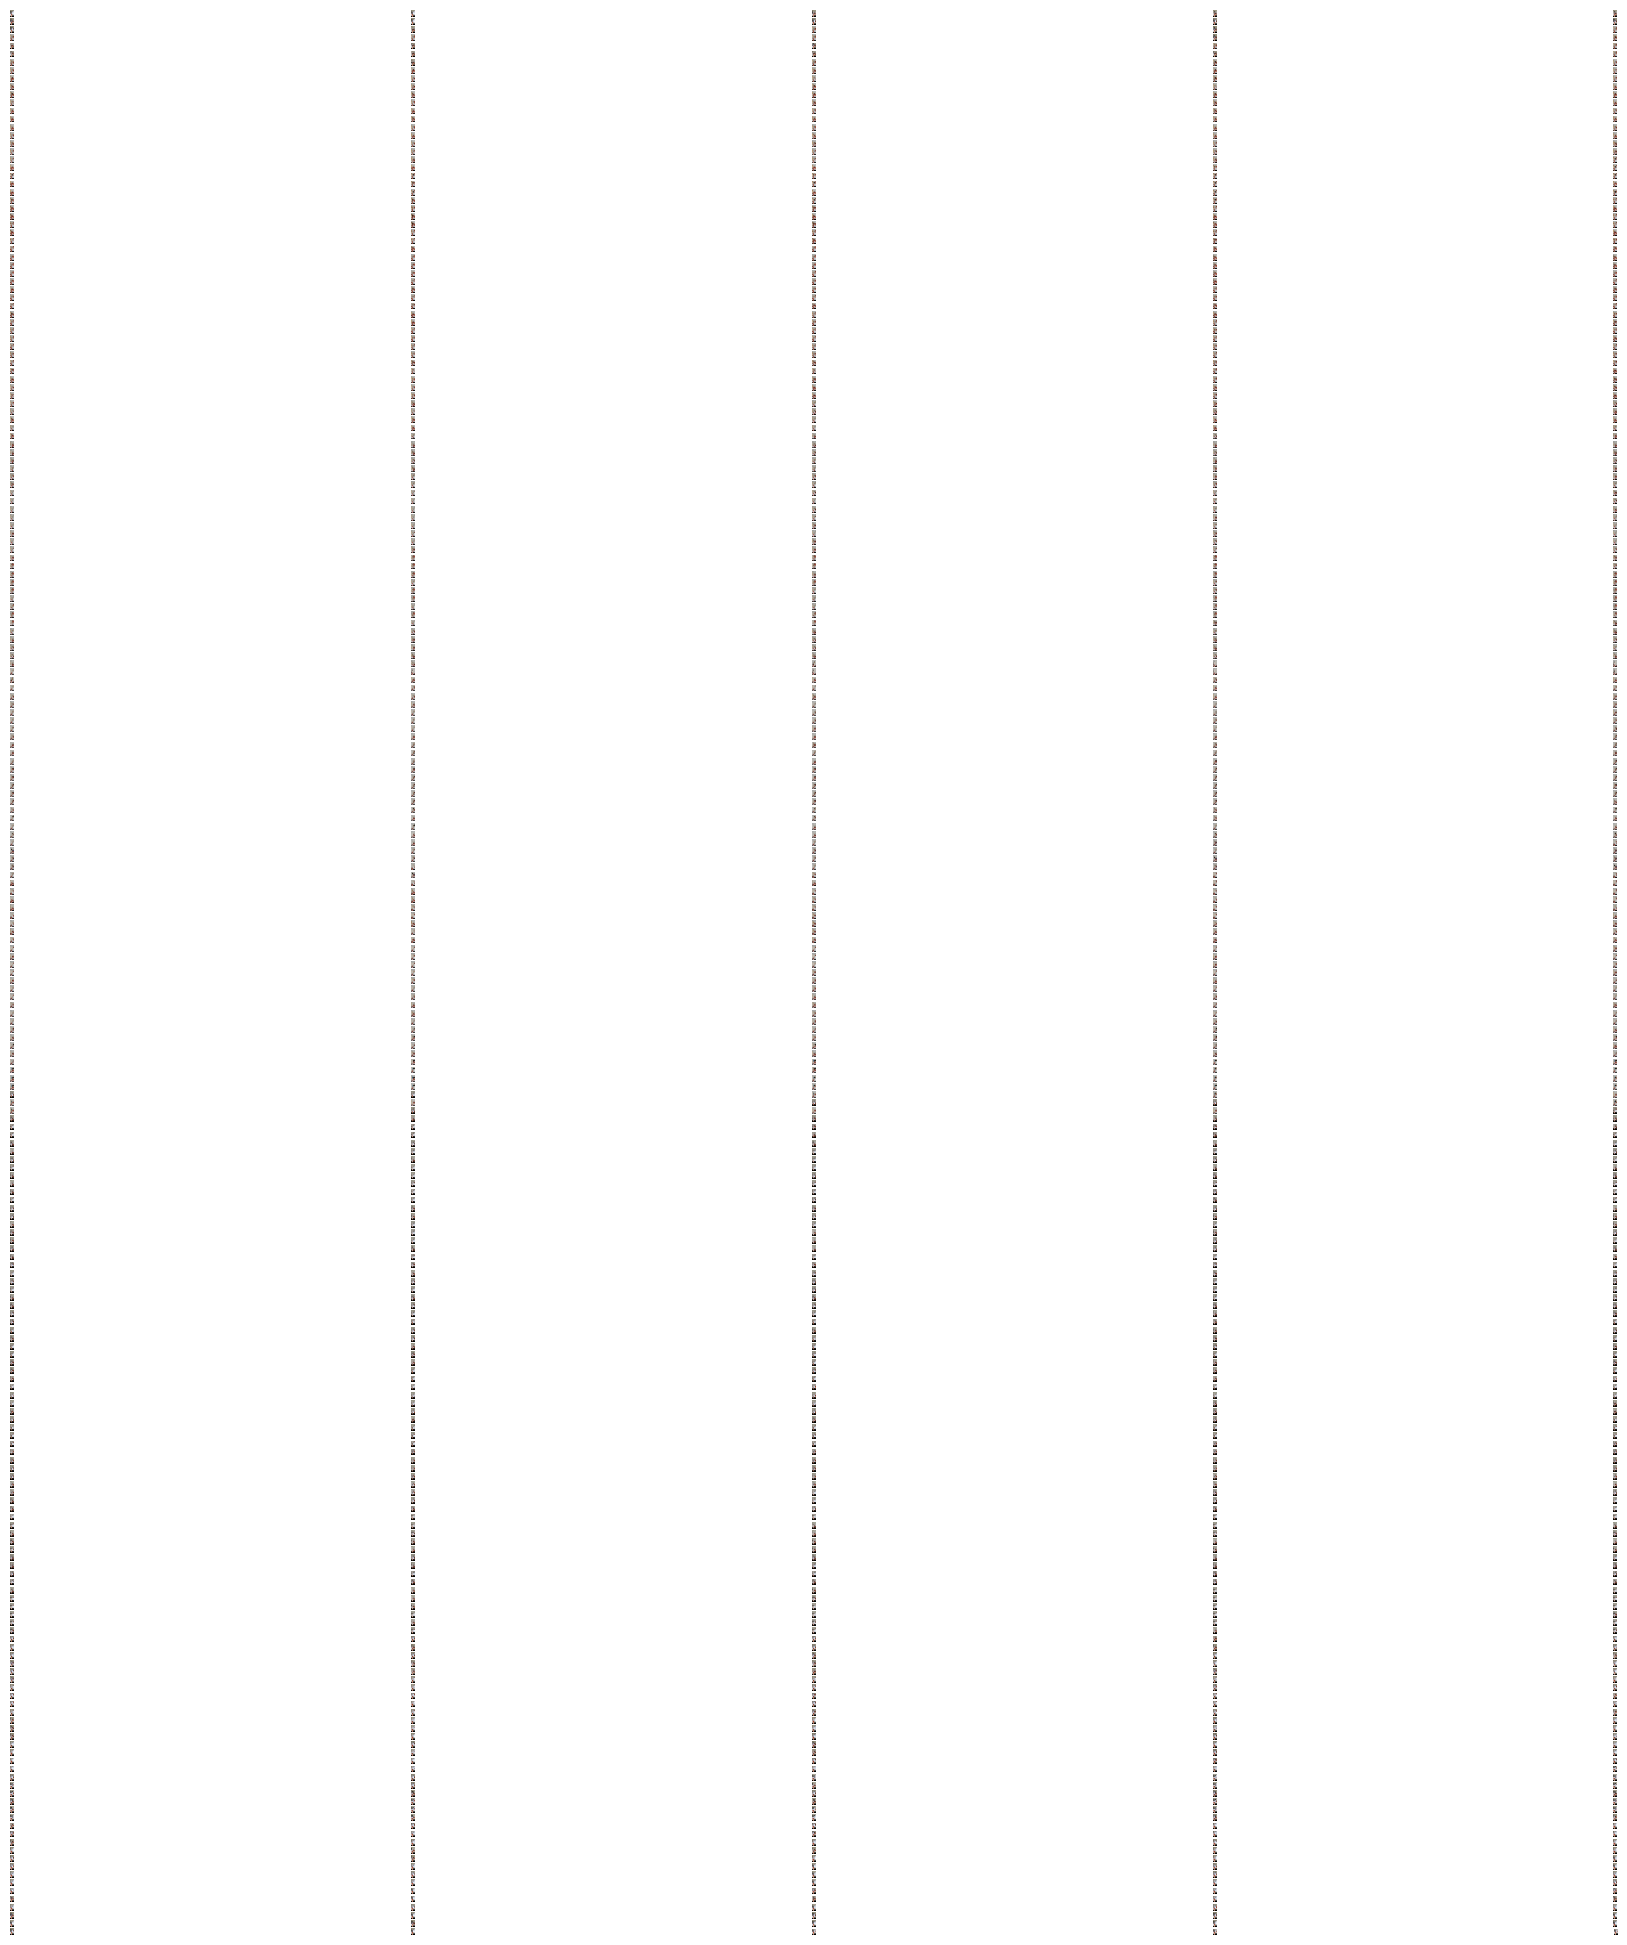

Testing images:


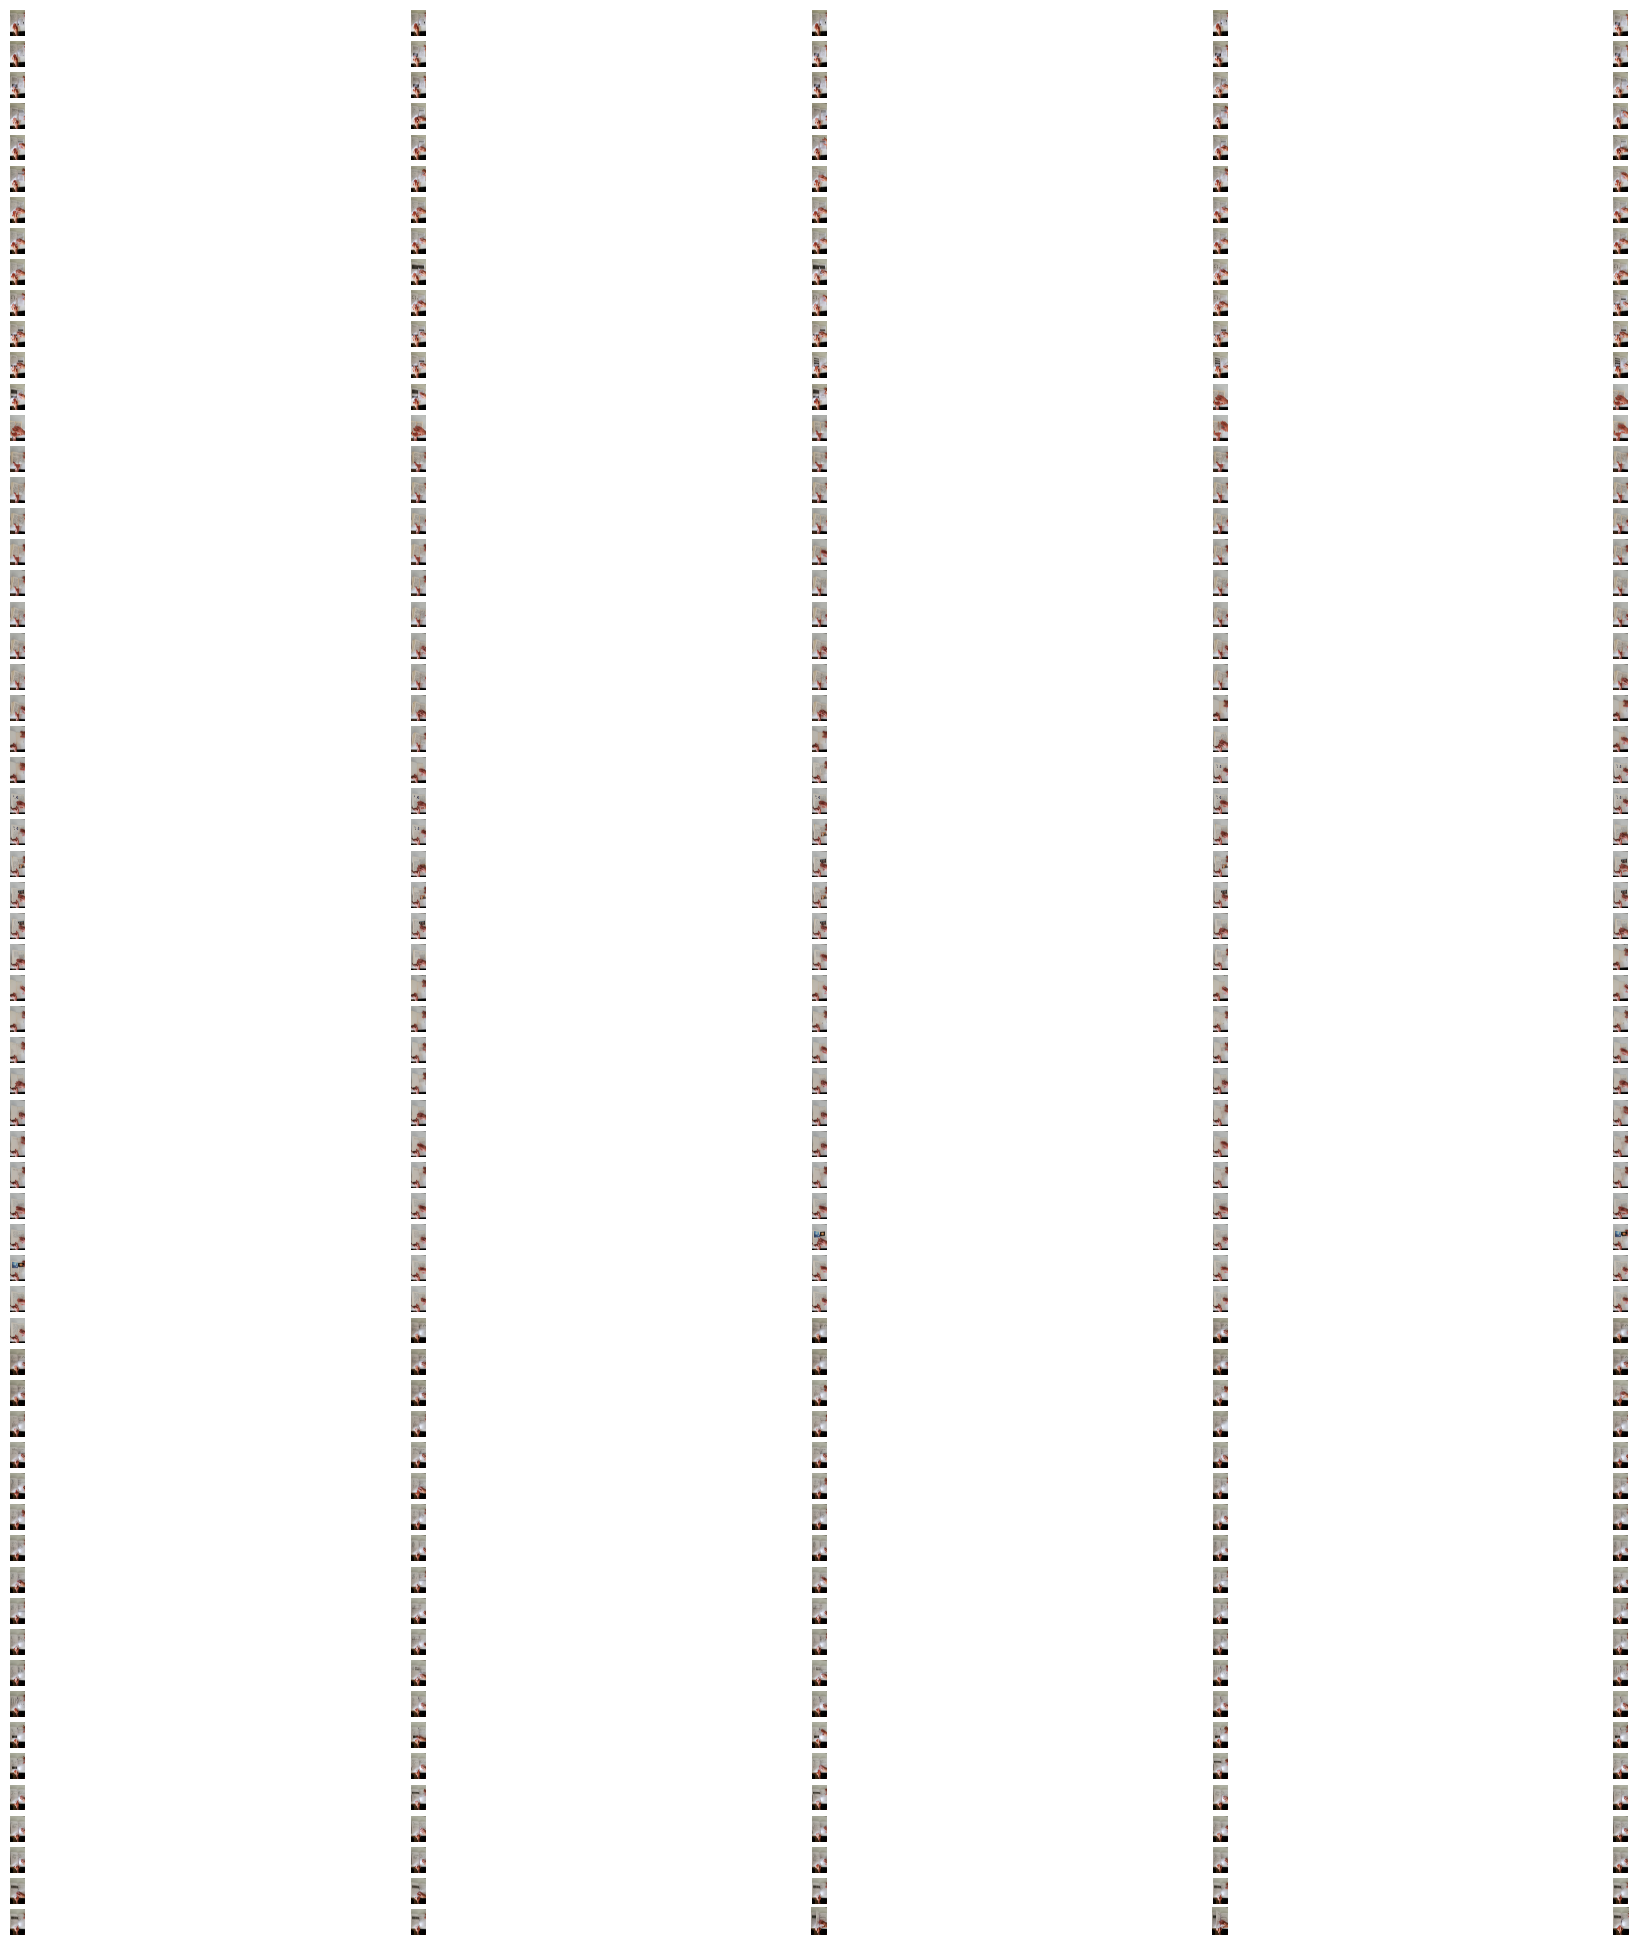

In [ ]:
# Displying the images using Matplotlib library
# Function to display images from a directory
def display_images(directory):
    # Get list of subdirectories (flip and not flip) in the directory
    subdirectories = [subdir for subdir in os.listdir(directory) if os.path.isdir(os.path.join(directory, subdir))]

    # Plot the images from each subdirectory
    plt.figure(figsize=(25, 25))
    total_images = 0
    for subdir in subdirectories:
        subdir_path = os.path.join(directory, subdir)
        images = [file for file in os.listdir(subdir_path) if file.endswith('.jpg') or file.endswith('.png')]
        total_images += len(images)
        for i in range(len(images)):
            img_path = os.path.join(subdir_path, images[i])
            img = mpimg.imread(img_path)
            plt.subplot(math.ceil(len(images)/5), 5, i+1)
            plt.imshow(img)
            plt.axis('off')
    plt.show()

# Display images from training directory
print("Training images:")
display_images(train_dir)

# Display images from testing directory
print("Testing images:")
display_images(test_dir)

In [ ]:
# Data generators with preprocessing
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 239 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['flip', 'notflip'],
    target_size=(200, 200),  # Resize all images to 200x200
    batch_size=239,
    class_mode='binary'
)

# Flow testing images in batches of 59 using test_datagen generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    classes=['flip', 'notflip'],
    target_size=(200, 200),  # Resize all images to 200x200
    batch_size=59,
    class_mode='binary',
    shuffle=False
)

Found 2422 images belonging to 2 classes.
Found 597 images belonging to 2 classes.


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 23, 23, 128)      

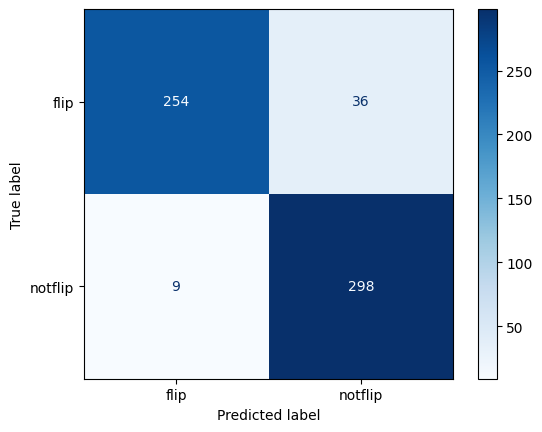

Test Classification Report:
              precision    recall  f1-score   support

        flip       0.97      0.88      0.92       290
     notflip       0.89      0.97      0.93       307

    accuracy                           0.92       597
   macro avg       0.93      0.92      0.92       597
weighted avg       0.93      0.92      0.92       597



In [ ]:
# Defining CNN architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=1e-4),
              metrics=['accuracy'])

# Displaying model summary
model.summary()

# Callbacks for early stopping and saving the best model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss', mode='min')

# Training the model
model_train = model.fit(
    train_generator,
    epochs=15,
    validation_data=test_generator,
    callbacks=[early_stopping, model_checkpoint]
)

# Load the best model
model.load_weights('best_model.h5')

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")

# Making predictions on test data
test_predictions = model.predict(test_generator)

# Get predicted class labels (0 or 1) for test data
test_predicted_labels = (test_predictions > 0.5).astype(int).ravel()

# Get true labels from the test generator
test_true_labels = test_generator.classes

# Compute confusion matrix for test data
test_cm = confusion_matrix(test_true_labels, test_predicted_labels)

# Print confusion matrix for test data
print("Test Confusion Matrix:")
print(test_cm)

# Display confusion matrix for test data as a heatmap
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=test_generator.class_indices)
test_disp.plot(cmap=plt.cm.Blues)
plt.show()

# Print classification report for test data
print("Test Classification Report:")
print(classification_report(test_true_labels, test_predicted_labels, target_names=test_generator.class_indices.keys()))